# 로지스틱회귀(LogisticRegression)
- 선형회귀 알고리즘을 이용한 이진 분류 모델
- Sample이 특정 클래스에 속할 확률을 추정

## 확률 추정
- 선형회귀처럼 입력 특성(Feature)에 가중치 합을 계산한 값을 로지스틱 함수를 적용해 확률을 계산

$$
\hat{p} = \sigma \left( \mathbf{w}^{T} \cdot \mathbf{X} + \mathbf{b} \right)\\
\hat{p}:\: positive의\,확률,\quad \sigma():\:logistic\,함수,\quad \mathbf{w}:\:weight,\quad \mathbf{X}:\:input feature,\quad \mathbf{b}:\:bias
$$

## 로지스틱 함수
- 0과 1사이의 실수를 반환
- S자 형태의 결과를 보이는 **시그모이드 함수(sigmoid function)**

$$
\sigma(x) = \frac{1}{1 + \mathbf{e}^{-x}}
$$

- 샘플 **x**가 양성에 속할 확률

$$
\hat{y} = \begin{cases} 0\quad\hat{p}<0.5\\1\quad\hat{p}\geqq0.5 \end{cases}
$$

### 로지스틱 함수 시각화

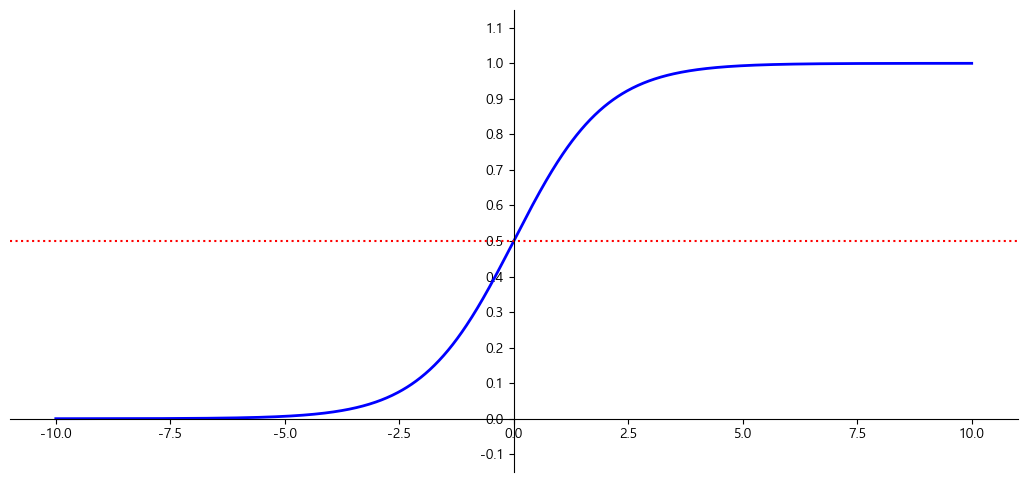

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def logistic_func(X):
    return 1 / (1 + np.exp(-X))

X = np.linspace(-10, 10, 1000)
y = logistic_func(X)

plt.figure(figsize = (13, 6))

plt.plot(X, y, color = 'b', linewidth = 2)

plt.axhline(y = 0.5, color = 'r', linestyle = ':')

plt.ylim(-0.15, 1.15)
plt.yticks(np.arange(-0.1, 1.2, 0.1))

ax = plt.gca()
ax.spines['left'].set_position("center")
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [2]:
np.min(y), np.max(y)

(4.5397868702434395e-05, 0.9999546021312976)

## LogisticRegression의 손실 함수
### **Cross Entropy(로그손실 - log loss)**
- 모델이 예측한 정답의 확률에 대해 log를 취해 손실값을 구한다
    - 확률이 틀리면 틀릴 수록 손실값을 크게 만들기 위해 log를 취한다
$$
\log{\left(모델이\,예측한\,정답에\,대한\,확률\right)}
$$

### **Binary Cross Entropy**
- Logistic 함수를 이용한 추론 결과에 대한 cross entropy 계산
    - Logistic 함수는 positive(1)의 확률만 추출하므로 정답이 0일때, 1일때 계산이 다르다
    - 하나의 공식으로 정의한 것이 binary cross entropy
$$
L(\mathbf{W}) = - \frac{1}{m} \sum_{i=1}^{m}{\left[ y_{i} \log{\left( \hat{p}_i \right)} + \left( 1 - y_i \right) \log{\left( 1 - \hat{p}_i \right)} \right]}\\
y:\:실제값(정답),\quad\hat{p}:\:예측확률(양성확률)
$$

- y(실제값) 이 1인 경우 $y_{i}\log{\left(\hat{p}_i\right)}$ 이 손실을 계산
- y가 0인 경우 $\left( 1 - y_i \right) \log{\left( 1 - \hat{p}_i \right)}$이 손실을 계산
- $\hat{p}$(예측확률)이 클수록 반환값은 작아지고 작을 수록 값이 커진다.

> - **Loss Function**
>   - 모델이 예측한 값과 정답간의 차이(오차, loss)를 구하는 함수
>   - 모델의 파라미터를 최적화할 때 loss를 최소화하는 것을 목적

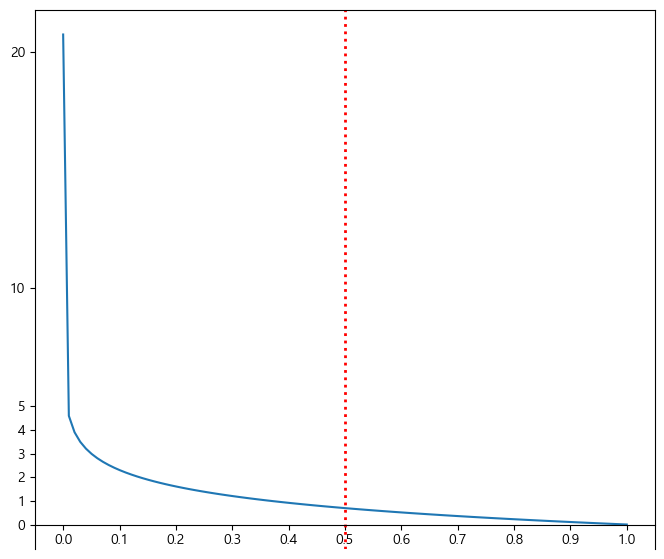

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0.000000001, 1, 100)  
y = -np.log(X)

plt.figure(figsize=(8, 7))
plt.plot(X, y)
plt.axvline(0.5, linestyle = ':', linewidth = 2, color = 'r')

plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks([0, 1, 2, 3, 4, 5, 10, 20])
plt.gca().spines['bottom'].set_position(('data', 0))
plt.show()    

## LogisticRegression의 최적화
- 분류 문제이므로 Cross entropy(Log loss함수)를 손실함수로 사용
- Cross entropy는 loss의 최소값으로 하는 파라미터를 찾는 방정식이 없어 `LogisticRegression은 경사하강법을 이용해 최적화를 진행`
- 로그 손실을 $\mathbf{W}$로 미분하면 다음과 같다.
    - 아래 도함수로 기울기를 구해 기울기가 0이 될 때 까지 W(가중치)들을 update
$$
\frac{\partial}{\partial w_j}L(W) = \frac{1}{m} \sum_{i=1}^{m}{\left( \sigma \left( \mathbf{W}^{T} \cdot \mathbf{x}_i \right) - \mathbf{y}_i \right)} x_{ij}
$$

## LogisticRegression 주요 하이퍼파라미터
- penalty: 과적합을 줄이기 위한 규제방식
    - 'l1', 'l2'(기본값), 'elasticnet', 'none'
- C: 규제강도(기본값-1): 작을수록 규제가 강함
- max_iter(기본값-100): 경사하강법 반복 횟수

## 예제

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from metrics import print_metrics_classification as pmc, print_metrics_classification2 as pmc2

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)

### 데이터 전처리
- LogisticRegression은 선형회귀 기반의 알고리즘이므로 연속형 Feature는 Feature scaling, 범주형 Feature는 One hot encoding 처리를 한다

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 모델 생성, 학습, 추론, 평가

In [10]:
lr = LogisticRegression(random_state = 0)
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [11]:
print(lr.coef_)
print(lr.intercept_)

[[-0.54384088 -0.34034271 -0.49560632 -0.56663005 -0.05559393  0.3999005
  -0.80734348 -1.10605291  0.02920742  0.40610307 -1.21922963 -0.13909852
  -0.51970089 -0.76005919 -0.21510325  0.69981736  0.02923076 -0.35243416
   0.47310794  0.55701021 -0.99402288 -1.10967269 -0.77768019 -0.87390453
  -0.46969384 -0.13650097 -0.68987558 -0.91744655 -0.70517455 -0.74475703]]
[0.33121447]


In [12]:
train_pred = lr.predict(X_train_scaled)
test_pred = lr.predict(X_test_scaled)

pmc(y_train, train_pred, 'Train set')
print('-'*30)
pmc(y_test, test_pred, 'Test set')

Train set
정확도(accuracy): 0.9906103286384976
재현율/민감도(recall): 0.9962546816479401
정밀도(precision): 0.9888475836431226
F1-score: 0.9925373134328358
------------------------------
Test set
정확도(accuracy): 0.958041958041958
재현율/민감도(recall): 0.9666666666666667
정밀도(precision): 0.9666666666666667
F1-score: 0.9666666666666667


In [15]:
train_proba = lr.predict_proba(X_train_scaled)
test_proba = lr.predict_proba(X_test_scaled)

pmc2(y_train, train_proba[:, 1], 'Train set')
print('-'*30)
pmc2(y_test, test_proba[:, 1], 'Test set')

Train set
Average Precision: 0.9985900639964463
roc_auc: 0.9979271194026335
------------------------------
Test set
Average Precision: 0.9971317270472638
roc_auc: 0.9951781970649896


### GridSearchCV를 이용해 하이퍼파라미터 탐색
- C

In [16]:
params = {
    'penalty' : ['l1', 'l2'],
    'C' : [0.01, 0.1, 1, 5, 10]
}

gs = GridSearchCV(LogisticRegression(random_state = 0, solver = 'liblinear'),
                  params,
                  scoring = ['accuracy', 'recall', 'precision'],
                  refit = 'recall',
                  cv = 4,
                  n_jobs = -1)
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=4,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 5, 10], 'penalty': ['l1', 'l2']},
             refit='recall', scoring=['accuracy', 'recall', 'precision'])

In [17]:
print('best_params:', gs.best_params_)
print('best_score:', gs.best_score_)

best_params: {'C': 0.1, 'penalty': 'l2'}
best_score: 0.9925373134328358


In [18]:
import pandas as pd

result = pd.DataFrame(gs.cv_results_)
result.sort_values('rank_test_recall').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,mean_test_recall,std_test_recall,rank_test_recall,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,mean_test_precision,std_test_precision,rank_test_precision
3,0.005747,0.003112,0.028484,0.021992,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.953271,0.971963,1.000000,...,0.992537,0.007463,1,0.942857,0.970588,1.000000,1.000000,0.978361,0.023756,1
5,0.009494,0.006686,0.008745,0.002770,1,l2,"{'C': 1, 'penalty': 'l2'}",0.953271,0.971963,0.990566,...,0.992537,0.007463,1,0.942857,0.970588,0.985294,0.970588,0.967332,0.015353,4
4,0.004747,0.000828,0.006746,0.001299,1,l1,"{'C': 1, 'penalty': 'l1'}",0.943925,0.962617,0.981132,...,0.985075,0.010554,3,0.929577,0.970149,0.985075,0.970588,0.963847,0.020677,5
7,0.021737,0.024423,0.005247,0.000433,5,l2,"{'C': 5, 'penalty': 'l2'}",0.925234,0.971963,0.981132,...,0.985075,0.018280,3,0.927536,0.970588,0.971014,0.970588,0.959932,0.018704,8
6,0.022486,0.014629,0.006497,0.002060,5,l1,"{'C': 5, 'penalty': 'l1'}",0.915888,0.971963,0.971698,...,0.981343,0.024468,5,0.926471,0.970588,0.957143,0.970588,0.956197,0.018019,10
